In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EGDI

In [116]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [117]:
egdi = egdi.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

EPART

In [118]:
epart = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Participation Index',
    var_name='Metric',
    value_name='EPART'
)

In [119]:
epart = epart.iloc[:, [0, 2]]

In [120]:
paises = epart['Country Name'].tolist()

ÍNDICE DE DEMOCRÁCIA ELEITORAL

In [121]:
ide = pd.read_csv('indice_democracia_eleitoral.csv')

In [122]:
ide = ide[ide['Year'] == 2024].reset_index(drop=True)

In [123]:
paises_diferentes_nomes = {
    "United States": "United States of America",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "South Korea": "Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Iran": "Iran (Islamic Republic of)",
    "Laos": "Lao People's Democratic Republic",
    "Moldova": "Republic of Moldova",
    "Tanzania": "United Republic of Tanzania",
    "Syria": "Syrian Arab Republic",
    "Vietnam": "Viet Nam",
    "Ivory Coast": "Côte d'Ivoire",
    "Micronesia": "Micronesia (Federated States of)",
    "Turkey": "Türkiye",
    "Cape Verde": "Cabo Verde",
    "Swaziland": "Eswatini",
    "Georgia": "Georgia (Country)",
    "Macedonia": "North Macedonia",
    "Democratic Republic of Congo": "Democratic Republic of the Congo"
}

In [124]:
ide['Entity'] = ide['Entity'].replace(paises_diferentes_nomes)

In [125]:
ide = ide[ide['Entity'].isin(paises)]

In [126]:
paises2 = ide['Entity'].tolist()
epart = epart[epart['Country Name'].isin(paises2)]

In [127]:
ide = ide.iloc[:, [0, 3]]

In [128]:
ide = ide.sort_values(by='Entity', ascending=True).reset_index(drop=True)

EGOV X ÍNDICE DE DEMOCRACIA

In [129]:
epart_ide = epart.copy()

In [130]:
epart_ide['Índice de Democracia Eleitoral'] = ide['Electoral democracy index (central estimate)']

In [131]:
epart_ide = epart_ide.rename(columns={
    'EPART': 'E-Participation Index'
})

In [132]:
epart_ide = epart_ide.iloc[:, [1, 2]]

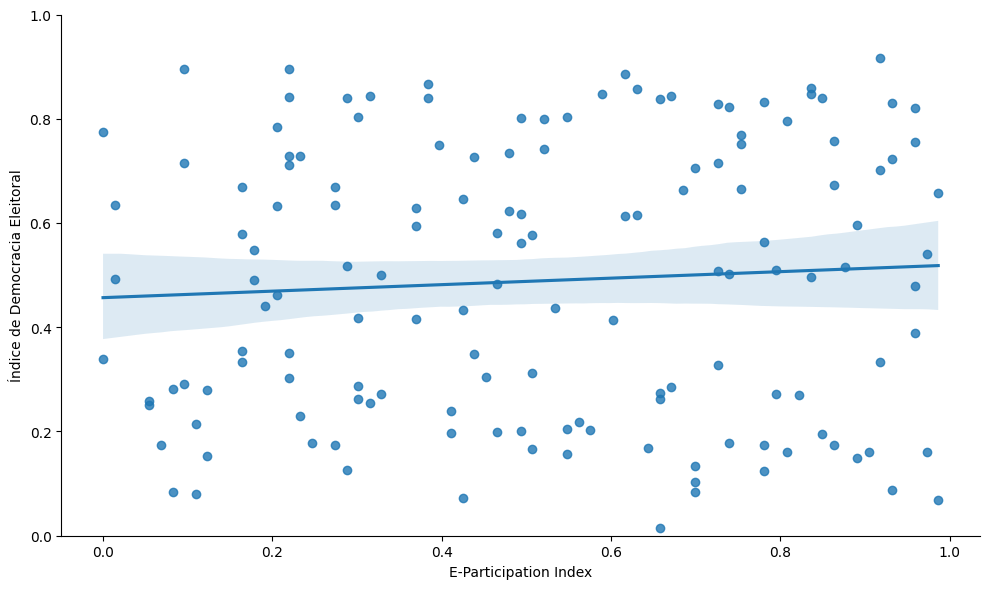

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(data=epart_ide, x='E-Participation Index', y='Índice de Democracia Eleitoral')

sns.despine()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()